In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import bz2 # To open compressed zip files
import re # converting files to 8-bit files 
import os #working with file directories
import gc #keeping track of all objects in memory

import matplotlib.pyplot as plt #for data visualization and a graphic plotting library 
import seaborn as sns #making statistical analysis by making statistical graphs

from nltk.corpus import stopwords #natural language toolkit taking  40 words which we do not want to use from the corpus
from nltk.classify import SklearnClassifier #supports many classification algorithms including  SVMs, Naive Bayes, logistic regression and decision trees.
 

In [2]:
# train and test are used to measure the accuracy of your model
train_file = bz2.BZ2File('train.ft.txt.bz2') #helps select a train file from the relative file directory from the uploaded file location
test_file = bz2.BZ2File('test.ft.txt.bz2') #helps select a train file from the relative file directory from the uploaded file location

In [3]:
#file method that helps to read one complete line from the given file.
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()

In [4]:
# clean the older variables
del train_file, test_file
gc.collect() #deletes unwanted objects (built-in types or class instances) automatically to free the memory space. 

0

# Data Preparation and Cleaning

At a high-level, what did you need to do to prepare the data for analysis? Describe what problems, if any, did you encounter with the dataset?
Each review with more than 100 words was imported and tokenized. Afterward, all of the tokens that were punctuations, label, stopword, or not an English word (emoji, special character, foreign languages) were removed.

The remaining tokens would undergo the process of lemmatizing using WordNetLemmatizer to reduce word to its root form, and Lemmatization using Wordnet Lemmatizer to acquire primal terms before appending into a clean list.

Following are the process followed:

Lowercasing

Tokenization

Stemming and Lemmatization

Removing Stopwords

Removing Punctuations

Removing Digits

Removing Url’s

In [5]:
#Convert from raw binary strings to strings that can be parsed
#UTF-8 can support many languages and can accommodate pages and forms in any mixture of those languages
#changes format from HTML file to the train and test files
train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

In [6]:
print(type(train_file_lines), type(test_file_lines), "\n")

print("Train Data Volume:", len(train_file_lines), "\n")
print("Test Data Volume:", len(test_file_lines), "\n\n")

print("Demo: ", "\n")
for x in train_file_lines[:2]:
    print(x, "\n")

<class 'list'> <class 'list'> 

Train Data Volume: 3600000 

Test Data Volume: 400000 


Demo:  

__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
 

__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, t

In [7]:
#Extracting Labels from the data

train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file_lines]
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file_lines]

In [8]:
train_labels[0]

1

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Train Labels distribution')

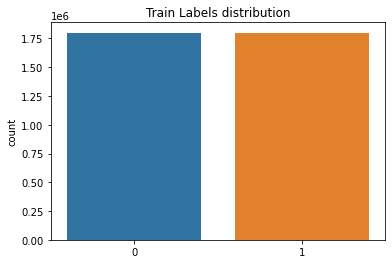

In [9]:
sns.countplot(train_labels) #countplot creates train labeled data a histogram across a categorical, instead of quantitative, variable
plt.title('Train Labels distribution')#just a naming of the barplot/histogram

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Test Labels distribution')

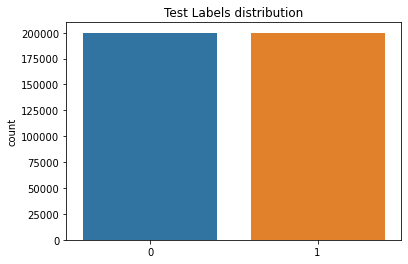

In [10]:
sns.countplot(test_labels) #countplot created using test labeled data a histogram across a categorical, instead of quantitative, variable
plt.title('Test Labels distribution') #just a naming of the barplot/histogram

In [11]:
#Extracting Reviews from the data
#split splits a string into a list
train_sentences = [x.split(' ', 1)[1][:-1] for x in train_file_lines]
test_sentences = [x.split(' ', 1)[1][:-1] for x in test_file_lines]

In [12]:
train_sentences[0]#picking the first review in train set

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Word Frequency Distribution in Reviews')

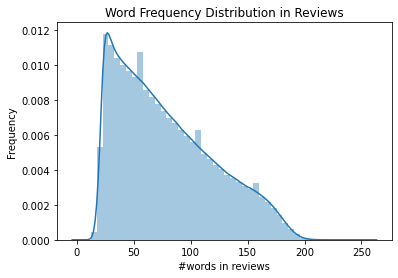

In [13]:
#Let’s count number of words in reviews and see it distribution
#lambda function takes any number of arguments, but can only have one expression
#distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution
train_sentences_size = list(map(lambda x: len(x.split()), train_sentences))

sns.distplot(train_sentences_size)
plt.xlabel("#words in reviews")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution in Reviews")

In [14]:

train_label_len = pd.DataFrame({"labels": train_labels, "len": train_sentences_size})
train_label_len.head()

,labels,len
0,1,80
1,1,97
2,1,129
3,1,118
4,1,87


Negative mean length: 81.50
Positive mean length: 75.46
Mean Difference: 6.04


Text(0.5, 1.0, 'Review Size Categorization')

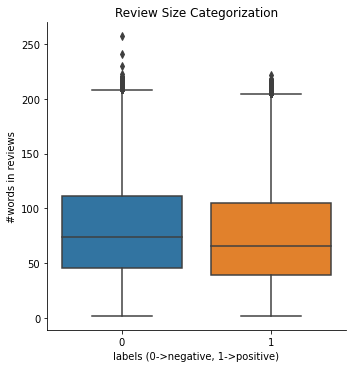

In [15]:
# Now we’ll divide it by sentiment and calculate average values
#groupby() function is used to split the data into groups based on some criteria
#2f means to round up to two decimal places.2f is a placeholder for floating point number.
#cat plot provides access to several axes-level functions 
#cat plot shows the relationship between a numerical and one or more categorical variables using one of several visual representations.
neg_mean_len = train_label_len.groupby('labels')['len'].mean().values[0]
pos_mean_len = train_label_len.groupby('labels')['len'].mean().values[1]

print(f"Negative mean length: {neg_mean_len:.2f}")
print(f"Positive mean length: {pos_mean_len:.2f}")
print(f"Mean Difference: {neg_mean_len-pos_mean_len:.2f}")
sns.catplot(x='labels', y='len', data=train_label_len, kind='box')
plt.xlabel("labels (0->negative, 1->positive)")
plt.ylabel("#words in reviews")
plt.title("Review Size Categorization")

In [16]:
del neg_mean_len,pos_mean_len
gc.collect()

0

In [17]:
# Clean URLs
#re.sub returns a string where all matching occurrences of the specified pattern are replaced by the replace string. 
for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])

for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])

In [18]:
list(filter(lambda x: '<url>' in x, train_sentences))[0]

"Bad Deal!!: I ordered this DVD and received a substitute I never received the DVD I ordered from Importcds (the Vendor). I contacted them and did not recieve any feedback. I can't rate a DVD I have never seen. I didn't bother to send it back because it would have cost me more that I orginally paid for it. In the future I will watch for the name of the person and/or persons I am buying from. I thought they were a good company. I understand a simple mistake but, to not get a response at all is not good businees sense. I spend hundreds of dollars a month on <url> building my DVD collection. I guess I will be more careful in the future."

In [19]:
del train_file_lines, test_file_lines
gc.collect()

0

Lowercasing

The CAPS in the texts are RATHER irritating although we KNOW the guy is trying to EMPHASIZE on something ;P

We can simply lowercase them after we do sent_tokenize() and word_tokenize(). The tokenizers uses the capitalization as cues to know when to split so removing them before the calling the functions would be sub-optimal.

Tokenization

Sentence tokenization is the process of splitting up strings into “sentences”
Word tokenization is the process of splitting up “sentences” into “words”
Stemming and Lemmatization¶
Often we want to map the different forms of the same word to the same root word, e.g. "walks", "walking", "walked" should all be the same as "walk".

The stemming and lemmatization process are hand-written regex rules written find the root word.

Stemming: Trying to shorten a word with simple regex rules
Lemmatization: Trying to find the root word with linguistics rules (with the use of regexes)

In [20]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('wordnet')

import nltk
from nltk import pos_tag
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

nltk.download('averaged_perceptron_tagger')

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]

lemmatize_sent('He is WALKING walking to school')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['he', 'be', 'walking', 'walk', 'to', 'school']

Stopwords
Stopwords are non-content words that primarily has only grammatical function. Often we want to remove stopwords when we want to keep the "gist" of the document/sentence.

Using a stronger/longer list of stopwords
After applying NLTK Stopwords we have still dangly model verbs (i.e. 'could', 'wont', etc.).

We can combine the stopwords we have in NLTK with other stopwords list we find online.

Personally, I like to use stopword-json because it has stopwrds in 50 languages

In [21]:
import nltk
nltk.download('stopwords')

# Stopwords from stopwords-json
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
# Combine the stopwords. Its a lot longer so I'm not printing it out...
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Clean Digits

def preprocess_text(text):
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    return [word for word in lemmatize_sent(text) 
            if word not in stoplist_combined
            and not word.isdigit()]

In [23]:
train_sentences[10]

"The Worst!: A complete waste of time. Typographical errors, poor grammar, and a totally pathetic plot add up to absolutely nothing. I'm embarrassed for this author and very disappointed I actually paid for this book."

In [24]:
import nltk
nltk.download('omw-1.4')

import nltk
nltk.download('wordnet')
preprocess_text(train_sentences[10])

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['bad',
 'complete',
 'waste',
 'time',
 'typographical',
 'error',
 'poor',
 'grammar',
 'totally',
 'pathetic',
 'plot',
 'add',
 'absolutely',
 "'m",
 'embarrassed',
 'author',
 'disappointed',
 'pay',
 'book']

Word Embeddings


From Strings to Vectors
Vector is an array of numbers

Vector Space Model: conceptualizing language as a whole lot of numbers

Bag-of-Words (BoW): Counting each document/sentence as a vector of numbers, with each number representing the count of a word in the corpus

Vector space model or term vector model is an algebraic model for representing text documents as vectors of identifiers, for example, index terms. It is used in information filtering, information retrieval, indexing and relevancy rankings.

We are using sklearn CountVectorizer to create Vector Space Model¶


Vectorization with sklearn


In scikit-learn, there're pre-built functions to do the preprocessing and vectorization.

It will be the object that contains the vocabulary (i.e. the first row of our table above) and has the function to convert any sentence into the counts vectors

In [25]:
from sklearn.feature_extraction.text import CountVectorizer as CountVectorizer

count_vect = CountVectorizer(analyzer=preprocess_text)

In [26]:
import nltk
nltk.download('omw-1.4')
train_set = count_vect.fit_transform(train_sentences[:10000])


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [27]:
train_set.toarray().shape

(10000, 32645)

In [28]:
test_set = count_vect.transform(test_sentences[:1000])

<AxesSubplot:title={'center':'Most Frequent Words'}, xlabel='word'>

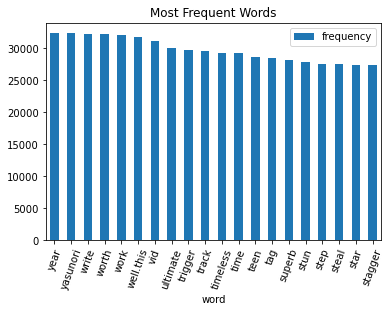

In [29]:
most_freq_words = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word', 'frequency'])[:100].sort_values(ascending=False, by = "frequency")[:20]
most_freq_words.plot.bar(x="word", y="frequency", rot=70, title="Most Frequent Words")

Methods


What methods did you use to analyze the data and why are they appropriate? Be sure to adequately, but briefly, describe your methods.
Multinomial Naive Bayes classifier in sklearn

Classification

Classification simply means putting our data points into bins/box. You can also think of it as assigning label to our data points, e.g. given box of fruits, sort them in apples, oranges and others.

Naive Bayes Classification

In statistics, Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models

There are different variants of Naive Bayes (NB) classifier in sklearn.

Multinomial is a big word but it just means many classes/categories/bins/boxes that needs to be classified.

In [30]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [31]:
clf.fit(train_set, train_labels[:10000])

MultinomialNB()

In [32]:
from sklearn.metrics import accuracy_score

# To predict our tags (i.e. whether requesters get their pizza), 
# we feed the vectorized `test_set` to .predict()
predictions_valid = clf.predict(test_set)

print('Amazon Sentiment Analysis Accuracy = {}'.format(
        accuracy_score(predictions_valid, test_labels[:1000]) * 100)
     )

Amazon Sentiment Analysis Accuracy = 82.69999999999999


****Feature Importance****

In [33]:
def important_features(vectorizer,classifier,n=40):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names()

    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]

    class1_frequency_dict = {}
    class2_frequency_dict = {}
    
    for coef, feat in topn_class1:
        class1_frequency_dict.update( {feat : coef} )

    for coef, feat in topn_class2:
        class2_frequency_dict.update( {feat : coef} )

    return (class1_frequency_dict, class2_frequency_dict)

In [34]:
neg_frequency_dict, pos_frequency_dict = important_features(count_vect, clf)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
neg_feature_freq = pd.DataFrame(neg_frequency_dict.items(), columns = ["feature_word", "frequency"])  
pos_feature_freq = pd.DataFrame(pos_frequency_dict.items(), columns = ["feature_word", "frequency"])  

<AxesSubplot:title={'center':'Important Negative Features(words)'}, xlabel='feature_word'>

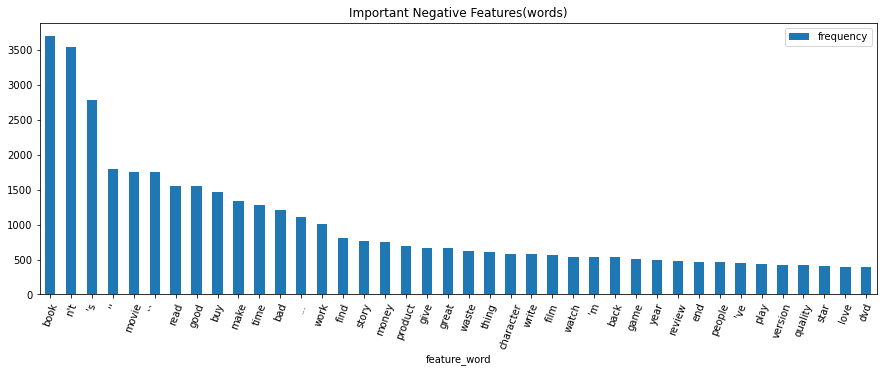

In [36]:
neg_feature_freq.plot.bar(x="feature_word", y="frequency", rot=70, figsize=(15, 5), title="Important Negative Features(words)")

<AxesSubplot:title={'center':'Important Positive Features(words)'}, xlabel='feature_word'>

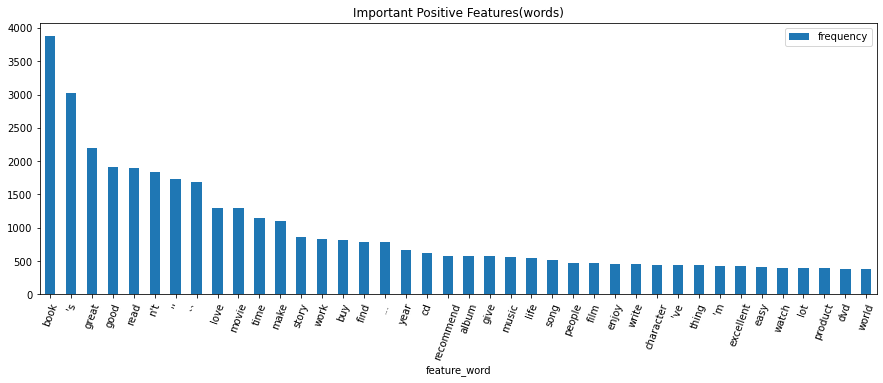

In [37]:
pos_feature_freq.plot.bar(x="feature_word", y="frequency", rot=70, figsize=(15, 5), title="Important Positive Features(words)")

Limitations

If applicable, describe limitations to your findings. For example, you might note that these results were true for British Premier league players but may not be applicable to other leagues because of differences in league structures.
Or you may note that your data has inherent limitations. For example, you may not have access to the number of Twitter followers per users so you assumed all users are equally influential. If you had the number of followers, you could weight the impact of their tweet’s sentiment by their influence (# of followers).
Model is trained on the Amazon Product Review data, and does not assure guarantee of predicting correct label (positive or negative)for other e-commerce websites.

The knowledge of categories of products are unknown, so we can to predict accuracy of prediction in product category segments.

The predictions are always limitied to efficiency of:

Data Cleaning Algorithms

Text Embedding Algorithms

Prediction Algorithm